# Introduction to Information Theory

## Exercise 1

(entropy, implementation)

Consider two fair dice with 6 sides each.

1. Print the probability distribution of the sum $S$ of the numbers obtained by throwing the two dice.
1. What is the information content in bits of the events $S=2$, $S=11$, $S=5$, $S=7$.
1. Calculate the entropy of S.
1. Lets say you throw the die one at a time, and the first die shows 4. What is the entropy of S after this observation? Was any information gained/lost in the process of observing the outcome of the first die toss? If so, calculate how much information (in bits) was lost or gained.

## Exercise 2

(information gain, implementation or analysis)

Given the dataset below, calculate the information gain for the target variable 'Edible' and each feature ('Weight', 'Smell', 'Spots', 'Smooth'):

In [1]:
import pandas as pd
import numpy as np
import math

def generate_probabilities(observations):
    x_values = np.unique(observations)
    pmf_x = [ (observations.count(value) / len(observations)) for value in x_values]
    return pmf_x

def calculate_entropy(probabilities):
    logarithms = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(prob*logarithms(prob) for prob in probabilities)

def calculate_conditional_entropy(dataset, feature, target_feature):
    prob_target = generate_probabilities( list(dataset[target_feature]) )
    h_feature_target = 0
    for i, target in enumerate(np.unique(dataset[target_feature])): 
        filtret_x = list()
        for k in range(0, len( dataset[target_feature] )):
            if dataset[target_feature][k] == target:
                filtret_x.append( dataset[feature][k] )

        prob_feat_y_target = list()
        for j, ftr in enumerate(np.unique(dataset[feature])):
            count = filtret_x.count(ftr) 
            prob_feat_y_target.append(count/len(filtret_x))

        h_feat_y_target = calculate_entropy(prob_feat_y_target)
        h_feature_target += h_feat_y_target * prob_target[i]
    
    return h_feature_target


features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)
print(mushrooms)

h_edible = calculate_entropy(generate_probabilities(list(mushrooms['Edible'])))
print("\nH(Edible) =",calculate_entropy(generate_probabilities(list(mushrooms['Edible']))))

print("IG(Edible|Weight) =", h_edible - calculate_conditional_entropy(mushrooms, "Edible", "Weight"))
print("IG(Edible|Smell) =", h_edible - calculate_conditional_entropy(mushrooms, "Edible", "Smell"))
print("IG(Edible|Spots) =", h_edible - calculate_conditional_entropy(mushrooms, "Edible", "Spots"))
print("IG(Edible|Smooth) =", h_edible - calculate_conditional_entropy(mushrooms, "Edible", "Smooth"))

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0

H(Edible) = 0.954434002924965
IG(Edible|Weight) = 0.0032289436203635224
IG(Edible|Smell) = 0.0032289436203635224
IG(Edible|Spots) = 0.0032289436203635224
IG(Edible|Smooth) = 0.04879494069539858


## Exercise 3

(entropy and information gain, implementation or analysis)

The following code simulates the season results for football team F:

In [2]:
from itertools import product
import pandas as pd
import random
random.seed(1)
opponents = ['Team '+chr(ord('A') + i) for i in range(5)]
stadiums = ['Home', 'Away']
games = pd.DataFrame(list(product(opponents, stadiums))*2,
                     columns=['opponent', 'stadium'])
games['result'] = random.choices(["Win", "Loss", "Draw"],
                                 k=len(games))
# print(games)

print("\n***********************************")
print("Ex1")
h_result = calculate_entropy(generate_probabilities(list(games['result'])))
print("H(result) =", h_result)

print("***********************************")

print("Ex2")
h_result_stadium = calculate_conditional_entropy(games, "result", "stadium")
h_result_opponent = calculate_conditional_entropy(games, "result", "opponent")
print("H(result|stadium) =", h_result_stadium)
print("H(result|opponent) =", h_result_opponent)

print("***********************************\n")

print("IG(result|stadium) =", h_result - h_result_stadium)
print("IG(result|opponent) =", h_result - h_result_opponent)

print("***********************************\n")


***********************************
Ex1
H(result) = 1.5588718484453605
***********************************
Ex2
H(result|stadium) = 1.5464393446710152
H(result|opponent) = 1.1245112497836531
***********************************

IG(result|stadium) = 0.01243250377434535
IG(result|opponent) = 0.4343605986617074
***********************************



1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?
1. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?
1. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

# Exercise 4

(entropy, implementation or analysis)

Consider the random variable $C$ "a person has a cold" and the random variable $T$ "outside temperature". The joint distribution of the two variables is given below:

       T_Sunny  T_Rainy  T_Snowy
C_No      0.30     0.20      0.1
C_Yes     0.05     0.15      0.2
pmf_T = [0.35, 0.35, 0.3]
pmf_C = [0.6, 0.4]


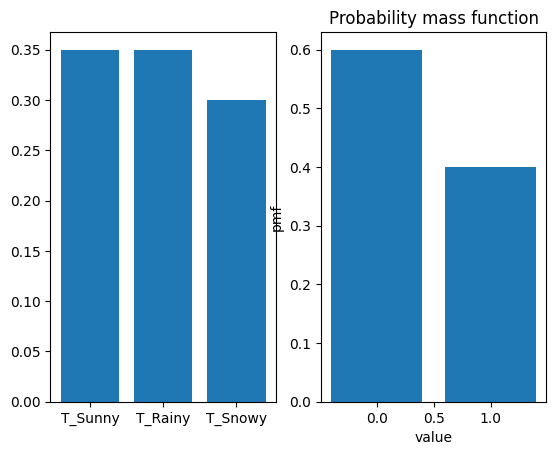

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.DataFrame({'T_Sunny': [0.3, 0.05], 
                  'T_Rainy': [0.2, 0.15], 
                  'T_Snowy': [0.1, 0.2]}, 
                 index=['C_No', 'C_Yes'])

print(d)
pmf_T = [ sum(d["T_Sunny"]), sum(d["T_Rainy"]), round(sum(d["T_Snowy"]), 2) ]
pmf_C = [ d['T_Sunny'][i] + d['T_Rainy'][i] + d['T_Snowy'][i] for i in range(0, len(d))]

print("pmf_T =", pmf_T)
print("pmf_C =", pmf_C)

fig, ax = plt.subplots(1, 2)
ax[0].bar([ele for ele in d], pmf_T)
ax[1].bar([0,1], pmf_C)
plt.ylabel("pmf")
plt.xlabel("value")
plt.title("Probability mass function")
plt.show()

1. Plot the pmf of $C$ and $T$.
1. Calculate $H(C)$, $H(T)$.
1. Calculate $H(C|T)$, $H(T|C)$. Does the temperature (T) reduce the uncertainty regarding someone having a cold (C)?

# Exercise 5

(decision tree, implementation)

Consider the Boolean expression $A \lor (B \land C)$. The corresponding truth table can be generated with:

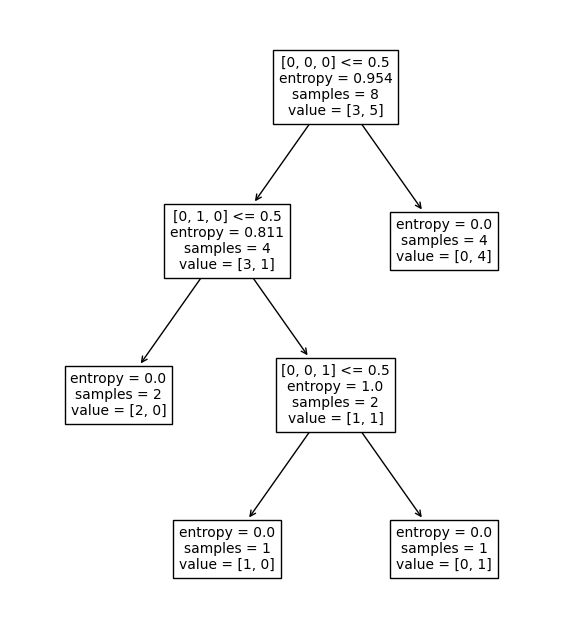

In [13]:
from itertools import product
from sklearn import tree
import matplotlib.pyplot as plt

X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]

dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)

fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X)
plt.show()

1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.
1. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?